# Исследование объявлений о продаже квартир


### План выполнения проекта ###


 [Шаг 1. Изучение общей информации](#step1)
 
 
 [Шаг 2. Предобработка данных](#step2)
 
 
 [Шаг 3. Подсчет и добавление в таблицу данных](#step3)
 
 
 [Шаг 4. Исследовательский анализ данных](#step4)
 
 
 [Шаг 5. Выводы](#step5)
 

## <a id="step1">Шаг 1. Изучение общей информации </a>

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [1]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Да, похоже нужно вплотную заняться предобработкой данных до начала исследования.

* **first_day_exposition**    23699 non-null object  - *привести к дате*
* **ceiling_height**          14504 non-null float64 - *пропуски*
* **floors_total**            23613 non-null float64 - *пропуски. привести к int (не может быть 3,20 этажей)*
* **living_area**            21796 non-null float64 - *пропуски*
* **is_apartment**            2775 non-null object   - *пропуски, привести к bool (скорее, это и причина пропусков)*
* **kitchen_area**            21421 non-null float64 - *пропуски, может, где-то нет кухни?*
* **balcony**                12180 non-null float64 - *пропуски, могут отсутствуют балконы. привести к int (не может быть 0,2                                                          балкона)*
* **locality_name**           23650 non-null object  - *пропуски в 49 строках*
* **airports_nearest**        18157 non-null float64 - *пропуски, может в нас. пункте нет аэропортов*
* **cityCenters_nearest**     18180 non-null float64 - *пропуски, может нас. пункт - это не город*
* **parks_around3000**        18181 non-null float64 - *пропуски, может не быть парков в 3 км, привести к int*
* **parks_nearest**           8079 non-null float64  - *пропусков много, возможно из-за отсутствия парков в столбце parks_around3000*
* **ponds_around3000**        18181 non-null float64 - *пропуски, может не быть парков в 3 км, привести к int*
* **ponds_nearest**           9110 non-null float64  - *пропусков много, возможно из-за отсутствия парков в столбце ponds_around3000*
* **days_exposition**         20518 non-null float64 - *пропуски, привести к int*

Вывод: очень много пропусков, проверить их, возможно это логически объясняется.

## <a id="step2">Шаг 2. Предобработка данных </a>

* **first_day_exposition** 

Приводим данные в first_day_exposition к дате, чтоб в дальнейшем с ней работать

In [2]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


* **balcony** 

Скорее всего, пропуски в balcony возникли там, где нет балконов. Заменим пропущенные значения на 0, приведем к int. Так как количество балконов - целочисленное значение.

In [3]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

* **floors_total**

Пропуски в floors_total. Может быть, это дома, где только один этаж. 

In [4]:
display(data[data['floors_total'].isna()].sample(5)) 
display(data['floors_total'].describe())
print('Процент пропусков в столбце floors_total: {:.1%}'.format(data['floors_total'].isna().sum()/len(data)))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12352,5,19900000.0,124.32,2018-08-03,3,NaN,NaN,NaN,4,NaN,...,NaN,0,Санкт-Петербург,18978.0,4600.0,0.0,NaN,1.0,931.0,NaN
11328,10,5386325.0,58.13,2018-10-10,3,NaN,NaN,31.00,9,NaN,...,NaN,0,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,135.0
12399,0,2895000.0,29.61,2019-01-29,1,NaN,NaN,14.16,4,NaN,...,9.1,0,Санкт-Петербург,19533.0,18535.0,1.0,375.0,0.0,NaN,NaN
21753,7,6800000.0,57.00,2017-05-01,2,NaN,NaN,NaN,21,NaN,...,NaN,0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0
1757,5,3600000.0,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Процент пропусков в столбце floors_total: 0.4%


Логическая зависимость от других данных вряд ли есть. 
Пропусков в этом столбце менее 1%, их удаление не повредит анализу.
И приводим к int, так как количество этаже - целочисленное значение.

In [5]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int')

* **ceiling_height**

Взглянем на пропуски, а также на статистическое описание данного столбца

In [6]:
display(data[data['ceiling_height'].isna()].sample(5)) 
print(data['ceiling_height'].describe())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9696,11,850000.0,52.0,2019-02-26,2,NaN,5,30.0,4,NaN,...,9.0,1,деревня Торошковичи,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8923,16,4300000.0,34.0,2018-09-30,1,NaN,10,17.5,6,NaN,...,7.0,1,Санкт-Петербург,10596.0,13971.0,0.0,NaN,0.0,NaN,6.0
13207,9,5450000.0,54.0,2015-02-09,2,NaN,22,29.0,11,NaN,...,10.0,0,Санкт-Петербург,17730.0,16527.0,0.0,NaN,2.0,350.0,1079.0
1663,11,7650000.0,67.0,2017-10-18,2,NaN,13,37.5,13,NaN,...,10.6,1,Санкт-Петербург,33756.0,13625.0,0.0,NaN,0.0,NaN,6.0
15091,9,2000000.0,55.5,2018-02-26,2,NaN,5,31.0,5,NaN,...,9.0,0,деревня Сяськелево,NaN,NaN,NaN,NaN,NaN,NaN,357.0


count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Стандартное отклонение меньше среднего, среднее и медиана примерно равны, можно брать либо медиану, либо среднее для заполнения пропущенных значений. 

In [7]:
print('Средняя высота потолка составляет: {:.2f}'.format(data['ceiling_height'].median()))
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

Средняя высота потолка составляет: 2.65
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null int64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            2775 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest    

* **is_apartment**

Апартаменты - вид жилья, который встречается очень редко. Заполним данные пропуски False.

In [8]:
print(data['is_apartment'].value_counts(dropna=False)) 
data['is_apartment'] = data['is_apartment'].fillna(False)
data.info()

NaN      20838
False     2725
True        50
Name: is_apartment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null int64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        181

* **living_area и kitchen_area**

Так как эти значения по большей части зависят от общей площади, можно рассчитать квантили в столбце total_area и по квинтилям присвоить значения нашим столбцам.


In [9]:
print(data['living_area'].isna().sum())
print(data['kitchen_area'].isna().sum())

print(data['living_area'].describe())
print(data['kitchen_area'].describe())

quantiles = [0.25, 0.5, 0.75]

1870
2231
count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [10]:
def fill_nan_area(data):
    # Функция итерирует список с квантилямя и при условии, что значение в столбце total_area меньше следующего квантиля
    # этого столбца, заполняет пропущенные значения данного квантиля столбцов kitchen_area и Living_area
    for x in quantiles:
        total_area = data['total_area']
        data.loc[total_area <= total_area.quantile(x+0.25), 'living_area'] = data.loc[
            total_area <= total_area.quantile(x+0.25), 'living_area'].fillna(data['living_area'].quantile(x))
        data.loc[total_area <= total_area.quantile(x+0.25), 'kitchen_area'] = data.loc[
            total_area <= total_area.quantile(x+0.25), 'kitchen_area'].fillna(data['kitchen_area'].quantile(x))

fill_nan_area(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around

* **locality_name**

Проанализируем пропуски в locality_name 


In [11]:
display(data[data['locality_name'].isnull()].sample(10))
print(data['locality_name'].value_counts(normalize=True))
print('Процент пропусков в столбце locality_name: {:.1%}'.format(data['locality_name'].isna().sum()/len(data)))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13690,7,3500000.0,71.0,2016-06-23,3,2.75,2,45.6,1,False,...,8.0,2,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
18526,3,10800000.0,86.0,2016-06-24,4,3.20,7,48.0,2,False,...,12.0,0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,65.0
14342,3,3611000.0,53.5,2017-04-27,1,2.65,4,25.8,3,False,...,9.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
7330,8,5100000.0,63.0,2015-01-27,3,2.65,5,42.0,1,False,...,7.5,0,NaN,25925.0,4627.0,2.0,459.0,0.0,NaN,566.0
15686,13,4700000.0,44.0,2015-12-01,2,2.65,5,28.0,3,False,...,5.0,0,NaN,35920.0,9633.0,2.0,472.0,3.0,535.0,280.0
10122,5,8200000.0,83.0,2015-06-24,4,2.65,5,53.0,2,False,...,10.0,0,NaN,25771.0,4474.0,2.0,374.0,0.0,NaN,364.0
14273,2,4422000.0,60.0,2016-03-23,2,2.75,23,32.0,14,False,...,11.9,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,90.0
21276,0,17122148.0,178.3,2017-02-10,1,2.65,3,41.7,1,False,...,41.6,1,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0
16499,2,4995573.0,56.9,2016-06-17,2,2.65,24,29.2,14,False,...,10.9,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,4.0
17764,9,8400000.0,94.0,2016-01-24,3,2.65,23,52.0,5,False,...,11.5,0,NaN,36865.0,10976.0,0.0,NaN,1.0,856.0,305.0


Санкт-Петербург                      0.664163
посёлок Мурино                       0.022067
посёлок Шушары                       0.018629
Всеволожск                           0.016889
Пушкин                               0.015659
                                       ...   
деревня Кисельня                     0.000042
деревня Ялгино                       0.000042
садовое товарищество Приладожский    0.000042
деревня Иссад                        0.000042
село Шум                             0.000042
Name: locality_name, Length: 364, dtype: float64
Процент пропусков в столбце locality_name: 0.2%


Пропусков мало, нет показателей, который смогли бы нам подсказать, какой именно это населенный пункт. 
Так как значений немного, около 0.2%, удалим пропущенные значения.
Невооруженным взглядом видны возможные дубликаты, связанные с написанием слова посЁлок. 
Тем не менее, мы не будем на данном этапе разбирать эти дубликаты, так как задач проанализировать продажи квартир по каждому населенному пункту, у нас не стоит.

In [12]:
data.dropna(subset=['locality_name'], inplace=True)

* **airports_nearest, cityCenters_nearest**

Так как эти данные заполнялись картографически, скорее всего, в объявлениях не было указано местоположение.
Проанализируем пропуски в данных столбцах по населенным пунктам.

In [13]:
print(data['locality_name'].value_counts(normalize=True).head(10))

print(data[data['airports_nearest'].isna()]['locality_name'].value_counts(normalize=True).head(10))
print('Процент пропусков в столбце airports_nearest: {:.1%}'.format(data['airports_nearest'].isna().sum()/len(data)))

print(data[data['cityCenters_nearest'].isna()]['locality_name'].value_counts(normalize=True).head(10))
print('Процент пропусков в столбце cityCenters_nearest: {:.1%}'.format(data['cityCenters_nearest'].isna().sum()/len(data))) 


Санкт-Петербург      0.664163
посёлок Мурино       0.022067
посёлок Шушары       0.018629
Всеволожск           0.016889
Пушкин               0.015659
Колпино              0.014343
посёлок Парголово    0.013877
Гатчина              0.013028
деревня Кудрово      0.012688
Выборг               0.010057
Name: locality_name, dtype: float64
посёлок Мурино             0.094135
Всеволожск                 0.072049
Гатчина                    0.055576
деревня Кудрово            0.054127
Выборг                     0.042904
Кудрово                    0.030956
деревня Новое Девяткино    0.025887
Сертолово                  0.025706
Кириши                     0.022629
Сланцы                     0.020275
Name: locality_name, dtype: float64
Процент пропусков в столбце airports_nearest: 23.4%
посёлок Мурино             0.094528
Всеволожск                 0.072350
Гатчина                    0.055808
деревня Кудрово            0.054354
Выборг                     0.043083
Кудрово                    0.031085


Итак, почти все пропущенные значения в данных столбцах в Ленинградской области, не в самом Санкт-Петербурге.
Так как нам нужны будут для анализа только данные о расстоянии до центра города в городе Санкт-Петербург, рассмотрим тщательнее пропуски в cityCenters_nearest непосредственно в этом городе.
Создадим таблицу, в котором хранится срез данных по квартирам в Санкт-Петербурге с пропущенными значениями в cityCenters_nearest.

In [14]:
data_spb_without_cityCenters_nearest = data[(data['cityCenters_nearest'].isna())&(data['locality_name']=='Санкт-Петербург')]

print('Процент пропусков в столбце cityCenters_nearest: {:.1%}'.format(len(data_spb_without_cityCenters_nearest)/len(data))) 

Процент пропусков в столбце cityCenters_nearest: 0.3%


Так как процент пропущенных значений в столбце cityCenters_nearest в Санкт-Петербурге ниже 1%, можно удалить данные значения.
Сохраним индексы данных строк из таблицы data_spb_without_cityCenters_nearest в отдельной переменной и удалим строки с данными индексами из таблицы.

In [15]:
row_index_for_drop = data_spb_without_cityCenters_nearest.index
print(row_index_for_drop)

# Оставляем в таблице только те строки, индекс которых не входит в диапазон значений переменной row_index_for_drop
data = data.query("index not in @row_index_for_drop")


Int64Index([   81,   593,   604,   742,   795,  1336,  1872,  1895,  2364,
             2707,  2882,  3200,  3501,  4323,  4781,  5216,  5444,  5908,
             7272,  7592,  9435, 10220, 10684, 10879, 11132, 11193, 11796,
            11801, 11872, 12446, 13470, 14682, 14944, 14969, 15161, 15919,
            16218, 16247, 16580, 17757, 17791, 18292, 18315, 18651, 19084,
            19130, 19148, 19233, 19267, 19861, 19870, 19998, 20104, 20977,
            21399, 21668, 21881, 21955, 22554, 22628],
           dtype='int64')


* **parks_around3000 и ponds_around3000**

Скорее всего, при отсутствии данных в столбце parks_nearest и ponds_nearest, будут пропущены данные в колонках parks_around3000 и ponds_around3000, соответственно.
Так как эти данные нам также не понадобятся, оставим пропущенные значения.
Было бы лучше заменить тип данных на int, так как в столбцах содержатся данные о количестве парках и водоемах. Будем иметь это ввиду.

* **days_exposition**

Проанализируем пропуски в данном столбце и возможные варианты замены пропущенных значений.

In [16]:
# Проанализируем статистические описания по days_exposition в зависимости от населенного пункта, то есть по категориям
display(data.groupby('locality_name')['days_exposition'].describe().sort_values('count', ascending=False).head(15))

# Проанализируем по первому дню подачи объявления этот же столбец.
print(data[data['days_exposition'].isna()]['first_day_exposition'].sample(10))

print(data['days_exposition'].describe())

,count,mean,std,min,25%,50%,75%,max
locality_name,,,,,,,,
Санкт-Петербург,13552.0,182.773022,224.685268,1.0,42.00,95.0,231.00,1572.0
посёлок Мурино,515.0,148.058252,194.929141,3.0,35.00,73.0,177.00,1187.0
посёлок Шушары,407.0,156.429975,182.084115,3.0,45.00,92.0,194.50,1130.0
Всеволожск,339.0,197.085546,216.620783,4.0,45.00,123.0,270.50,1413.0
Колпино,308.0,143.600649,177.849751,3.0,40.00,74.0,185.50,1131.0
Пушкин,307.0,209.579805,245.973143,3.0,57.50,130.0,260.00,1512.0
посёлок Парголово,302.0,155.503311,188.446662,3.0,44.25,79.0,211.50,1452.0
деревня Кудрово,299.0,180.872910,232.448256,3.0,44.00,80.0,228.50,1149.0
Гатчина,268.0,189.619403,218.939042,3.0,45.00,99.5,253.00,988.0


11643   2018-03-27
15540   2019-03-27
13770   2019-02-26
14539   2018-10-10
7086    2019-03-12
13737   2015-08-23
20189   2019-03-05
18321   2019-04-01
17414   2019-03-19
1257    2015-09-24
Name: first_day_exposition, dtype: datetime64[ns]
count    20369.000000
mean       180.769601
std        219.780816
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


При анализе пропущенных значений по населенному пункту стандартное отклонение больше среднего, необходимо найти другие признаки, по которым распределение будет нормальным. 
Года публикации объявлений с пропущенными данными в days_exposition варьируются, есть даже квартиры, которые подавались в 2016. Тем не менее, лучше ввести год подачи объявления для последующего анализа и заполнения пропущенныз значений.

In [17]:
# Добавляем год публикации объявления в таблицу
def year(date):
    year = date.year
    return year
data['year'] = data['first_day_exposition'].apply(year)


grouped_data_years = data.groupby('year')['days_exposition'].describe().sort_values('year')
display(grouped_data_years)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2014,118.0,911.338983,297.352627,554.0,607.25,876.0,1126.5,1580.0
2015,1096.0,651.603102,319.116967,182.0,392.00,580.5,888.0,1512.0
2016,2676.0,323.039611,257.554493,3.0,115.00,238.0,481.0,1153.0
2017,7883.0,159.082963,153.265098,3.0,45.00,103.0,227.0,825.0
2018,7522.0,94.210981,85.131290,3.0,34.00,63.0,130.0,465.0
2019,1074.0,30.950652,23.828886,1.0,12.00,23.5,45.0,110.0


Люди все быстрее закрывают объявления, с каждым годом. Также мы видим, что стандартное отклонение меньше среднего, это говорит о том, что можно заменить средней или медианой по этому признаку.
Заменим пропущенные значение в колонке days_exposition по медиане данного столбца по году публикации объявления. И заменим тип данных на целочисленный.

In [18]:
# Создание списка со всеми годами публикаций объявлений
row_years = grouped_data_years.index

def fill_nan_days(data):
    # Итерация по годам и заполнение пропущенных данных в days_exposition согласно медианы по годам
    for x in row_years:
        data.loc[data['year'] ==x, 'days_exposition'] = data.loc[
    data['year'] ==x, 'days_exposition'].fillna(grouped_data_years.loc[x]['50%'])
fill_nan_days(data)

data['days_exposition'] = data['days_exposition'].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23505 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23505 non-null int64
last_price              23505 non-null float64
total_area              23505 non-null float64
first_day_exposition    23505 non-null datetime64[ns]
rooms                   23505 non-null int64
ceiling_height          23505 non-null float64
floors_total            23505 non-null int64
living_area             23505 non-null float64
floor                   23505 non-null int64
is_apartment            23505 non-null bool
studio                  23505 non-null bool
open_plan               23505 non-null bool
kitchen_area            23505 non-null float64
balcony                 23505 non-null int64
locality_name           23505 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around

***
#### Заполнение пропущенных значений ####

Пропущенные значения **balcony** заполнены нулями, так как скорее всего, если пользователь не указал данные по количеству балконов в объявлении, это указывает их отсутствие.

Пропуски в **floors_total** были удалены, так как процент пропущенных значений менее 1%, не повлияет на анализ данных. Скорее всего, пользователи просто не указали этажность дома.

Пропущенные данные в столбце **is_apartment** заполнялись False, как самый возможный вариант, ввиду редкости апартаментов среди всех предлагаемых квартир. Пользователи могли просто не заполнить данную информацию.

В колонках **living_area** и **kitchen_area** были заполнены исходя из их зависимости от общей площади квартиры. Ведь обычно в объявлениях указывают общую площадь как самый важный показатель.

Пропусков в **locality_name** оказалось немного - всего 49 строчек. Данные пропуски не повлияют на анализ, нет признака, по которому можно было заменить данные значения, поэтому удаляем строки.

Пропуски в **airports_nearest**, **cityCenters_nearest** у квартир в Ленинградской области мы оставляем как есть, данные нам не понадобятся для дальнейшего анализа. Скорее всего, пользователи не указали точное расположение квартиры. И удаляем строчки с пропусками в cityCenters_nearest в городе Санкт-Петербурге для последующего анализа данного столбца.

Пропущенные значения **parks_around3000** и в **ponds_around3000** . Так как данные значения заполнялись картографически, то пропуски **parks_nearest** и **ponds_nearest** - это маркер того, что в радиусе 3 км нет парков и водоемов, соответственно, и расстояние до них определить невозможно. Более того, эти данные нам не понадобятся для последующего анализа, поэтому оставляем как есть.

Пропуски в **days_exposition** заполнены по медиане по году, в котором было выпущено объявление. Так как распределение по данным категориям было нормальным.

#### Изменение типов данных ####

В колонке **first_day_exposition** данные были приведены в формат *datetime* для последующей работы с датой.

В столбцах **balcony**, **floors_total**, **days_exposition**, данные приведены к *int*, как целочисленные значения. в последующем это облегчит работу с данными и, возможно, несколько уменьшит объем занимаемой памяти.

#### Добавление столбцов ####

Добавление столбцов годои публикации объявления (**year**).
***

## <a id="step3">Шаг 3. Подсчет и добавление в таблицу данных</a>

##### Добавление дня недели и месяца публикации объявления.

In [20]:
def weekday(date):
    weekday = date.dayofweek
    return weekday
data['weekday'] = data['first_day_exposition'].apply(weekday)

def month(date):
    month = date.month
    return month
data['month'] = data['first_day_exposition'].apply(month)     


##### Добавление цены квадратного метра.

In [21]:
data['price_per_m2'] = data['last_price'] / data['total_area']

#####  Добавление этажа квартиры: первый, последний, другой.

In [22]:
def floor_category(row):
    # Функция возвращает значение 'первый', если указанный этаж равен последнему и 1, 
    # 'последний' - если этаж равен последнему и не 1, и 'другой'
    floors_total = row['floors_total']
    floor = row['floor']
    if floors_total == floor:
        if floor == 1:
            return 'первый'
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

#####  Добавление соотношения жилой и общей площади, а также отношения площади кухни к общей.

In [23]:
data['ratio_living_area'] = data['living_area'] / data['total_area']
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23505 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23505 non-null int64
last_price              23505 non-null float64
total_area              23505 non-null float64
first_day_exposition    23505 non-null datetime64[ns]
rooms                   23505 non-null int64
ceiling_height          23505 non-null float64
floors_total            23505 non-null int64
living_area             23505 non-null float64
floor                   23505 non-null int64
is_apartment            23505 non-null bool
studio                  23505 non-null bool
open_plan               23505 non-null bool
kitchen_area            23505 non-null float64
balcony                 23505 non-null int64
locality_name           23505 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around

#### Добавление данных в таблицу ####

Были добавлены следующие столбцы:

**year, weekday, month** - год, день недели и месяц публикации объявления;

**price_per_m2цену** - цена квадратного метра;

**floor_category** - этаж квартиры — первый, последний, другой;

**ratio_living_area**, **ratio_kitchen_area** - соотношение жилой и общей площади, а также отношение площади кухни к общей.

## <a id="step4">Шаг 4. Исследовательский анализ данных </a>


##### 1) Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра. #####

Построим гистограммы по цене, площади, количеству комнат и высоте потолков. Исследуем дополнительно статистические описания стобцов методом describe().

In [25]:
print(data.loc[:, 'last_price':'ceiling_height'].describe())

# Выведем на экран отдельным столбцом статистическое описание столбца last_price, с указанием формата float
print(data['last_price'].describe().apply(lambda x: format(x, 'f')))


         last_price    total_area         rooms  ceiling_height
count  2.350500e+04  23505.000000  23505.000000    23505.000000
mean   6.516232e+06     60.248165      2.069985        2.724284
std    1.086737e+07     35.487966      1.077413        0.992183
min    1.219000e+04     12.000000      0.000000        1.000000
25%    3.400000e+06     40.000000      1.000000        2.600000
50%    4.620000e+06     52.000000      2.000000        2.650000
75%    6.750000e+06     69.600000      3.000000        2.700000
max    7.630000e+08    900.000000     19.000000      100.000000
count        23505.000000
mean       6516231.964816
std       10867371.409788
min          12190.000000
25%        3400000.000000
50%        4620000.000000
75%        6750000.000000
max      763000000.000000
Name: last_price, dtype: object


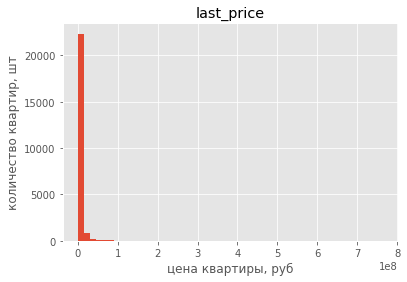

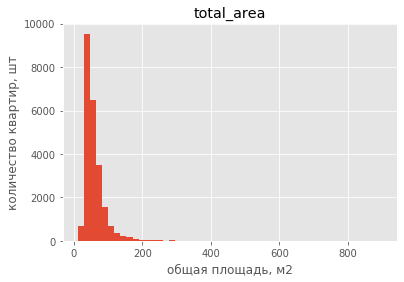

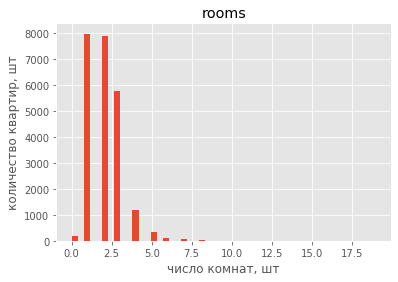

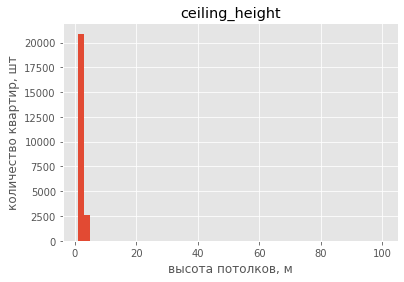

In [26]:
data_hist = data[['last_price', 'total_area', 'rooms', 'ceiling_height']]
plt.style.use('ggplot')


# Создание словаря для подписей осей
dict_hist = {'last_price': 'цена квартиры, руб', 'total_area':
        'общая площадь, м2', 'rooms': 'число комнат, шт', 'ceiling_height':
        'высота потолков, м', 'days_exposition': 'время продажи, дни'}

for x in data_hist:
    data.hist(column=x, bins = 50, range=(data_hist[x].min(), data_hist[x].max()))
    plt.title(x)
    plt.xlabel(dict_hist[x])
    plt.ylabel("количество квартир, шт")
    plt.show()
    


Конечно, графики получились нечитабельными. Мало того, что выбросы влияют, так еще масштаб маленький.

Построим гистограммы по отдельности. Зато видно, в каких областях сосредоточены все значения, это поможет в построении отдельных гистограмм.
   

#### * Площадь квартиры

count    23505.000000
mean        60.248165
std         35.487966
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        900.000000
Name: total_area, dtype: float64


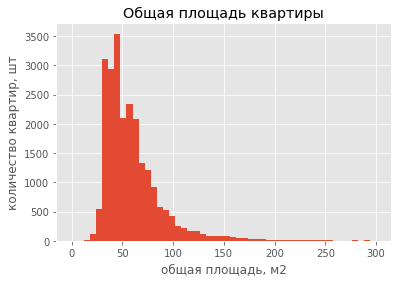

In [27]:
print(data['total_area'].describe())

plt.hist(data['total_area'], bins = 50, range = (0, 300))
plt.title('Общая площадь квартиры')
plt.xlabel(dict_hist['total_area'])
plt.ylabel("количество квартир, шт")
plt.show()

Тут уже все понятно - чаще всего продаются квартиры с площадью примерно 40-50 кв.м. Тем не менее, есть небольшое число квартир с площадью 100-200 кв.м. и 12-27 кв.м. Скорее, это малосемейки.

#### * Цена квартиры

count        23505.000000
mean       6516231.964816
std       10867371.409788
min          12190.000000
25%        3400000.000000
50%        4620000.000000
75%        6750000.000000
max      763000000.000000
Name: last_price, dtype: object


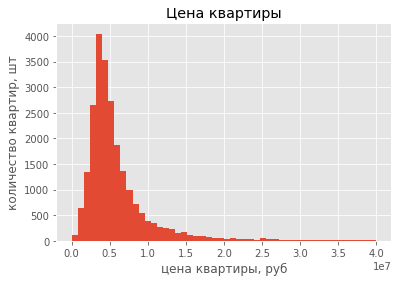

In [28]:
print(data['last_price'].describe().apply(lambda x: format(x, 'f')))

plt.hist(data['last_price'], bins = 50, range=(0, 40000000))
plt.title('Цена квартиры')
plt.xlabel(dict_hist['last_price'])
plt.ylabel("количество квартир, шт")
plt.show()



Цена большинства квартир в промежутке от 3 до 6 млн.руб
В статистическом описании видно, как сильно отличаются средняя и медиана. Квартира в 763 000 000 очень сильно повлияла. Скорее всего, это и есть особняк с 19 комнатами и потолками в 100 м.
Очень редко квартиры стоят больше 20 млн. руб. И почти никогда больше 40 млн. руб. 

#### * Число комнат в квартире

count    23505.000000
mean         2.069985
std          1.077413
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


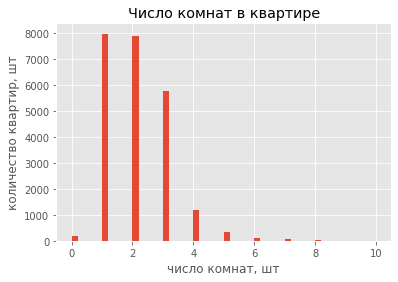

In [29]:
print(data['rooms'].describe())

plt.hist(data['rooms'], bins = 50, range =(0,10))
plt.title('Число комнат в квартире')
plt.xlabel(dict_hist['rooms'])
plt.ylabel("количество квартир, шт")
plt.show()


Большая часть квартир имеют от 1 до 3 комнат. 19 комнат - скорее, выброс. 0 комнат - продажи части комнаты или квартиры-студии, свободной планировки.
Очевидно, что 1-комнатные квартиры лидируют с небольшим отрывом от 2-комнатных. Чем больше комнат, тем меньше частота.
Больше 8 комнат - квартир почти нет. Есть также квартиры с 0 комнатами, наверное, это продажи половины комнаты

#### * Высота потолков квартиры

count    23505.000000
mean         2.724284
std          0.992183
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


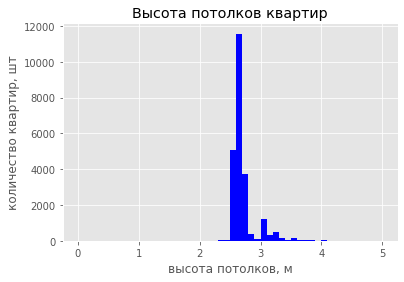

In [30]:
print(data['ceiling_height'].describe())
plt.hist(data['ceiling_height'], color = 'blue', bins = 50, range=(0, 5))
plt.title('Высота потолков квартир')
plt.xlabel(dict_hist['ceiling_height'])
plt.ylabel("количество квартир, шт")
plt.show()


Не смотря на то, что есть где-то квартира с потолком в 100 метров(а может, это ошибка), все же почти все квартиры
имеют высоту потолка до 3 метров. Небходимо изучить выбросы.
2,5 - 3 м - золотой стандарт высоты для потолков. Ниже - некомфортно жить. Выше - только элитное жилье и особняки. И их мало.

В данных много выбросов, в том время как основная масса квартир кучкуется в определенном диапазоне. Стоит в дальнейшем изучить выбросы и, возможно, удалить их для проведения дальнейшего анализа.

##### 2) Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? #####

In [31]:
print(data['days_exposition'].describe())

count    23505.00000
mean       165.17392
std        212.05290
min          1.00000
25%         35.00000
50%         80.00000
75%        204.00000
max       1580.00000
Name: days_exposition, dtype: float64


Стандартное отклонение больше среднего, медиана меньше среднего. Основная масса квартир была продана за 200 дней. Изучим гистограмму по всем данным и в промежутке от 0 до 200 дней.

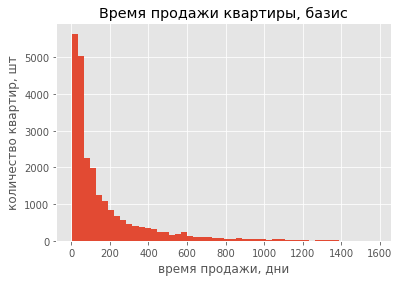

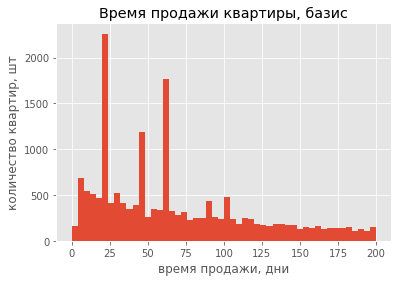

In [32]:
plt.hist(data['days_exposition'], bins = 50)
plt.title('Время продажи квартиры, базис')
plt.xlabel(dict_hist['days_exposition'])
plt.ylabel("количество квартир, шт")
plt.show()

plt.hist(data['days_exposition'], bins = 50, range=(0,200))
plt.title('Время продажи квартиры, базис')
plt.xlabel(dict_hist['days_exposition'])
plt.ylabel("количество квартир, шт")
plt.show()

Среднее арифметическое времени продажи квартир составляет 165 дней. При этом медиана составляет 80 дней, так как есть квартиры,
которые продавались очень долго, и они повлияли на среднее. Можно считать, что обычно продажа занимает 80 дней, медиана менее чувствительна к выбросам. Стандартное отклонение больше среднего, что неправильно.

Продажа квартиры считается быстрой, если совершается до 35 дней (25% наблюдений). 
Из диаграммы размаха видно, что продажа считается необычайно долгой, если продажа занимает более 457 дней (а это 1 год и 2 месяца). Тем не менее, из гистограммы видно, что квартиры продаются все меньше и меньше после отметки в 600 дней (а это 1 год и 8 месяцев).


##### 3) Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили. #####

Создаем копию таблицы, чтобы вносить изменения в копию.

In [33]:
filtered_data = data.copy()

##### * Цена квартиры

count        23505.000000
mean       6516231.964816
std       10867371.409788
min          12190.000000
25%        3400000.000000
50%        4620000.000000
75%        6750000.000000
max      763000000.000000
Name: last_price, dtype: object


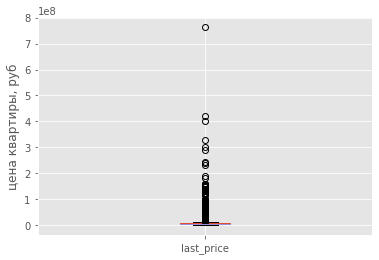

In [34]:
print(filtered_data['last_price'].describe().apply(lambda x: format(x, 'f')))

filtered_data.boxplot(column='last_price')
plt.ylabel(dict_hist['last_price'])
plt.show()

Нечитабельно, сразу видно, как влияют выброс в 763 млн. Также этот выброс очень сильно влияет на отклонение.
Из гистограммы мы могли заметить, что квартиры редко стоят больше 20 млн.руб. 
Уберем 5% значений.

count       22327.000000
mean      5154508.717517
std       2712329.297467
min         12190.000000
25%       3350000.000000
50%       4500000.000000
75%       6300000.000000
max      15098000.000000
Name: last_price, dtype: object


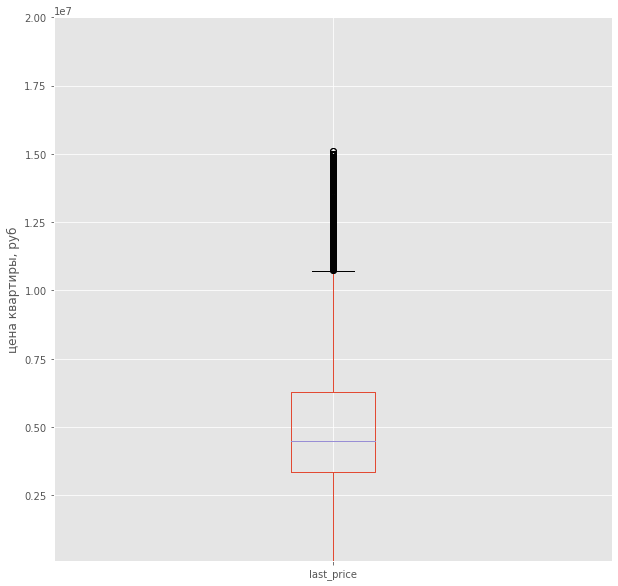

In [35]:
filtered_data = filtered_data[filtered_data['last_price'] < filtered_data['last_price'].quantile(0.95)]

print(filtered_data['last_price'].describe().apply(lambda x: format(x, 'f')))

filtered_data.boxplot(column='last_price', figsize = (10,10), grid=True)
plt.ylim(100000, 20000000)
plt.ylabel(dict_hist['last_price'])
plt.show()

Дело сделано - стандартное отклонение ниже среднего, среднее и медиана примерно одинаковы, можно анализировать

##### * Общая площадь квартиры

count    22327.000000
mean        55.176545
std         21.907033
min         12.000000
25%         39.400000
50%         50.100000
75%         65.700000
max        320.000000
Name: total_area, dtype: float64


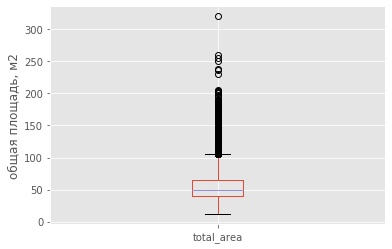

In [36]:
print(filtered_data['total_area'].describe())

filtered_data.boxplot(column='total_area')
plt.ylabel(dict_hist['total_area'])
plt.show()

При удалении 5% значений среди цен на квартиры, удалилось значение в total_area - 900 кв.м. а вместе с ним нормализовалось распределение в столбце.
Тем не менее, диаграмма размаха наглядно демонстирует нам, что все еще есть редкие значения. Уберем явные выбросы - 1%

In [37]:
filtered_data = filtered_data[filtered_data['total_area'] < filtered_data['total_area'].quantile(0.99)]
print(filtered_data['total_area'].describe())

count    22101.000000
mean        54.193039
std         19.535864
min         12.000000
25%         39.200000
50%         50.000000
75%         65.000000
max        125.800000
Name: total_area, dtype: float64


На данном этапе, стандартное отклонение ниже среднего, максимум площади квартиры опустился до 114. А среднее и медиана почти равны.

##### * Высота потолков квартиры

count    22101.000000
mean         2.707379
std          1.015782
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


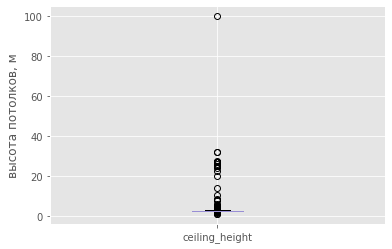

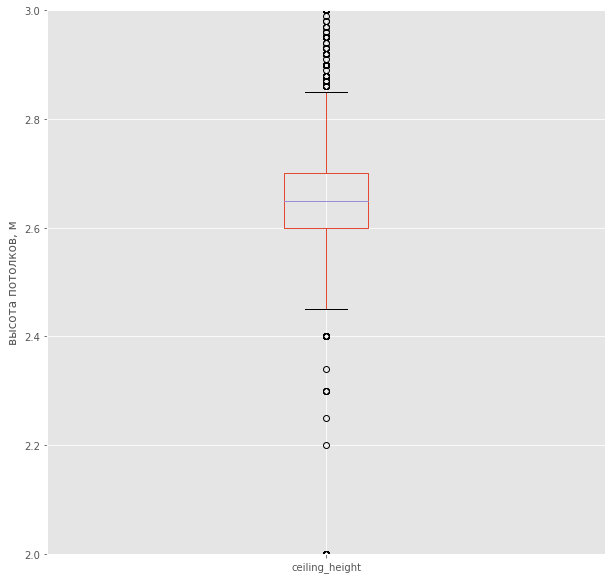

In [38]:
print(filtered_data['ceiling_height'].describe())

filtered_data.boxplot(column='ceiling_height')
plt.ylabel(dict_hist['ceiling_height'])
plt.show()

# Расмотрим ящик с усами в промежутке от 2 до 3 м. так как это основная масса наблюдений
filtered_data.boxplot(column='ceiling_height', figsize = (10,10), grid=True)
plt.ylim(2, 3)
plt.ylabel(dict_hist['ceiling_height'])
plt.show()

Квартиры распределены практически равномерно. Это говорит о том, что высота потолков - вещь стандартная. И можно смело удалять значения за пределами диаграммы размаха 

In [39]:
# Нахождение мехквартильного размаха
IQR_ceiling_height = filtered_data['ceiling_height'].quantile(0.75) - filtered_data['ceiling_height'].quantile(0.25)

# Нахождение максимального и минимального наблюдаемого максимума
low_ceiling = filtered_data['ceiling_height'].quantile(0.25) - IQR_ceiling_height * 1.5
high_ceiling = filtered_data['ceiling_height'].quantile(0.75) + IQR_ceiling_height * 1.5 

# Удаление значения за пределами наблюдаемых минимума и максимума
filtered_data = filtered_data[(filtered_data['ceiling_height'] > low_ceiling) & (filtered_data['ceiling_height'] < high_ceiling)]

print(filtered_data['ceiling_height'].describe())


count    19905.000000
mean         2.629613
std          0.081638
min          2.460000
25%          2.570000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64


##### * Число комнат квартиры

count    19905.000000
mean         1.903391
std          0.891671
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


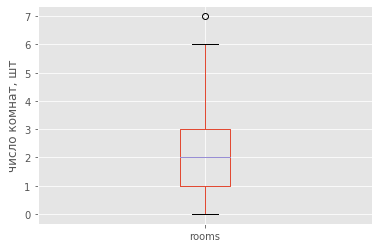

In [40]:
print(filtered_data['rooms'].describe())

filtered_data.boxplot(column='rooms')
plt.ylabel(dict_hist['rooms'])
plt.show()

Согласно диаграмме размаха, квартиры с 0 комнатами - нормальны.
Скорее всего, это продажи части комнаты, малосемейки или апартаментов. 
Видно, что 7комнатные квартиры встречаются иногда, при этом стандартное отклонение очень мало и меньше среднего. Можно оставить данные значения.

##### * Время продажи квартиры

count    19905.000000
mean       155.689525
std        200.361120
min          1.000000
25%         33.000000
50%         74.000000
75%        191.000000
max       1580.000000
Name: days_exposition, dtype: float64


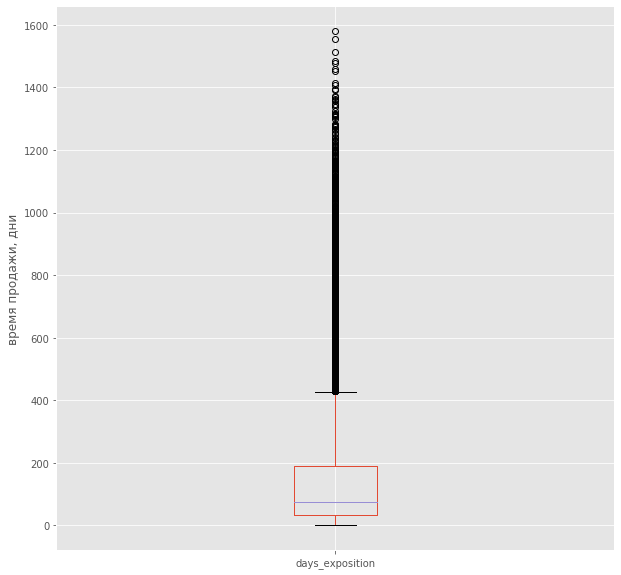

In [41]:
print(filtered_data['days_exposition'].describe())

filtered_data.boxplot(column='days_exposition', figsize = (10,10), grid=True)
plt.ylabel(dict_hist['days_exposition'])
plt.show()

Стандартное отклонение выше средних значений, необходимо удалить выбросы.
Можно выбрать диапазон количества дней продажи квартиры до 600 дней, так как после этой отметки количество продаж квартир очень мала. 
Мы же уберем 5% верхних значений, посмотрим, поможет ли это. 

count    18897.000000
mean       120.605652
std        125.775394
min          1.000000
25%         30.000000
50%         67.000000
75%        164.000000
max        579.000000
Name: days_exposition, dtype: float64


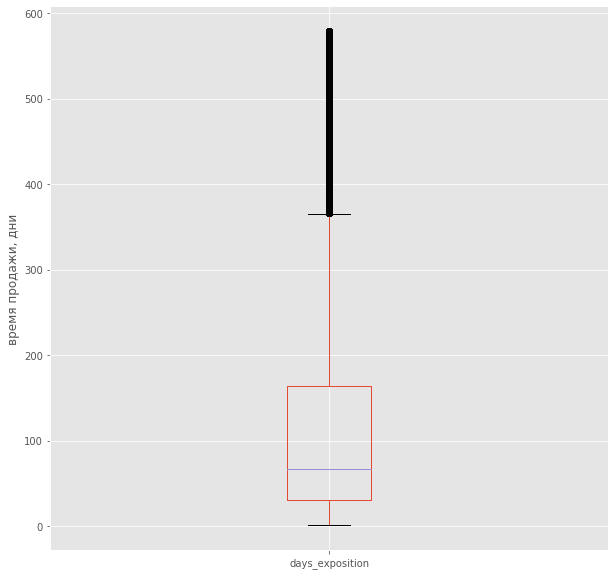

In [42]:
filtered_data = filtered_data[filtered_data['days_exposition'] < filtered_data['days_exposition'].quantile(0.95)] 
print(filtered_data['days_exposition'].describe())

filtered_data.boxplot(column='days_exposition', figsize = (10,10), grid=True)
plt.ylabel(dict_hist['days_exposition'])
plt.show()


Медиана смещена вниз, то есть основная масса наблюдений все же меньше, и выбросы отражаются на среднем. Нас устраивает.
Обращаем внимание, что необычайно долгая продажа теперь - это продажа, занимающая более  579 дней (более 1,5 года)

In [43]:
filtered_data.info()
filtered_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18897 entries, 0 to 23698
Data columns (total 29 columns):
total_images            18897 non-null int64
last_price              18897 non-null float64
total_area              18897 non-null float64
first_day_exposition    18897 non-null datetime64[ns]
rooms                   18897 non-null int64
ceiling_height          18897 non-null float64
floors_total            18897 non-null int64
living_area             18897 non-null float64
floor                   18897 non-null int64
is_apartment            18897 non-null bool
studio                  18897 non-null bool
open_plan               18897 non-null bool
kitchen_area            18897 non-null float64
balcony                 18897 non-null int64
locality_name           18897 non-null object
airports_nearest        13962 non-null float64
cityCenters_nearest     13977 non-null float64
parks_around3000        13977 non-null float64
parks_nearest           5477 non-null float64
ponds_around

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,weekday,month,price_per_m2,ratio_living_area,ratio_kitchen_area
count,18897.000000,1.889700e+04,18897.000000,18897.000000,18897.000000,18897.000000,18897.000000,18897.000000,18897.000000,18897.000000,...,5477.000000,13977.000000,6497.000000,18897.000000,18897.000000,18897.000000,18897.000000,18897.000000,18897.000000,18897.000000
mean,9.774885,4.796355e+06,52.299628,1.897814,2.629380,11.257237,29.434828,6.131344,9.413695,0.620310,...,501.319153,0.666380,541.078498,120.605652,2017.483251,2.589512,6.414881,91910.274140,0.556766,0.190397
std,5.568631,2.395924e+06,18.261116,0.889648,0.081523,6.682312,12.448082,5.007467,3.707347,0.956027,...,334.386943,0.856694,277.288541,125.775394,0.926459,1.795139,3.487149,30074.124473,0.104115,0.069183
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,2014.000000,0.000000,1.000000,111.834862,0.069588,0.043524
25%,6.000000,3.250000e+06,38.300000,1.000000,2.570000,5.000000,18.300000,2.000000,7.000000,0.000000,...,302.000000,0.000000,327.000000,30.000000,2017.000000,1.000000,3.000000,74242.424242,0.484848,0.139442
50%,9.000000,4.300000e+06,48.000000,2.000000,2.650000,9.000000,28.600000,5.000000,8.710000,0.000000,...,469.000000,0.000000,527.000000,67.000000,2018.000000,3.000000,6.000000,92336.683417,0.558233,0.175041
75%,14.000000,5.790000e+06,62.200000,3.000000,2.650000,16.000000,38.000000,8.000000,11.000000,1.000000,...,627.000000,1.000000,755.000000,164.000000,2018.000000,4.000000,10.000000,109177.215190,0.627907,0.233933
max,50.000000,1.509300e+07,125.800000,7.000000,2.850000,52.000000,96.000000,33.000000,60.000000,5.000000,...,3190.000000,3.000000,1344.000000,579.000000,2019.000000,6.000000,12.000000,387096.774194,1.430769,0.787879


Удаление 1% или 5% наблюдений при выборе редких и выбивающихся значений полезно только в том случае, если стандартное отклонение после удаления этих данных при этом методе приходит в норму.

Можно сразу пользоваться расчетом межквартильного размаха, но это чревато удалением бОльшего количества данных, пригодного для анализа.

**last_price** - убраны значения более 15.2 млн рублей путем удаления 5% верхних значений

**total_area** - Квартира в 900 кв.м. больше не находится в таблице, это произошло при удалении выбросов в колонке last_price, максимальное значение стало 320 кв.м. Согласно описательной статистике, данные годны для анализа.

**rooms** - так же, как и с общей площадью, 19комнатная квартира исчезла с радаром. А все остальное пригодно, так как выбросы не искажают общую картину.

**ceiling_height** - значения за усами ящика убраны, так как данный признак четко определен, прежде всего, законодательно.

**days_exposition** - удаление 5 % верхних значений повлияло в целом хорошо, данные пригодны для анализа. Обращаем внимание, что необычайно долгая продажа теперь - это продажа, занимающая более 579 дней (чуть больше 1,5 года)



##### 4) Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года. #####


##### Изучение зависимости цены от квадратного метра, числа комнат и удаленности от центра

,last_price,total_area,rooms,cityCenters_nearest
10794,2750000.0,44.0,2,NaN
12421,1350000.0,31.0,1,NaN
8706,5300000.0,77.8,3,NaN
20179,4450000.0,38.9,1,12403.0
2716,5050000.0,60.0,2,4262.0


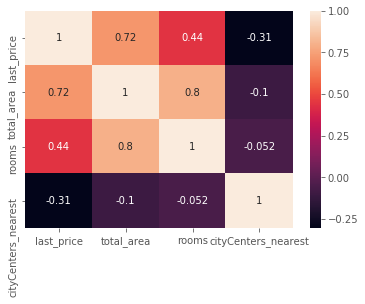

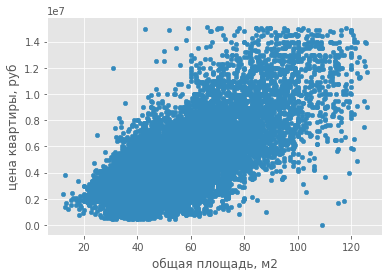

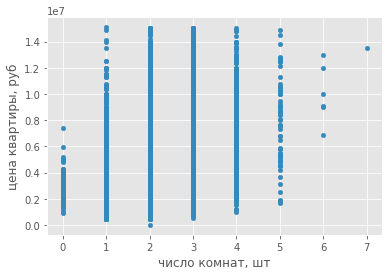

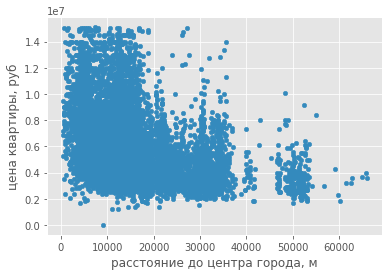

In [44]:
data_stat_1 = filtered_data[
    ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
display(data_stat_1.sample(5))

# Создание словаря для подписи графиков
dict_stat = {'last_price': 'цена квартиры, руб', 'total_area':
        'общая площадь, м2', 'rooms': 'число комнат, шт', 'cityCenters_nearest':
        'расстояние до центра города, м'}

# Создание визуального представления таблицы с индексами корреляции по заданному срезу
corrdata_stat_1 = data_stat_1.corr()
sn.heatmap(corrdata_stat_1, annot=True)
plt.show()

# Создание scatter графиков для наглядного представления зависимости столбцов
for x in data_stat_1.loc[:, 'total_area':]:
    data_stat_1.plot.scatter(x=x, y='last_price')
    plt.ylabel(dict_stat['last_price'])
    plt.xlabel(dict_stat[x])
    plt.show()


Кажется, больше всего на цену квартиры влияет ее метраж. 
Скорее всего, вкупе с расстоянием до центра будет давать еще выше корреляцию.
Зависимость с количеством комнат связана, прежде всего, с метражом квартиры.

##### * Изучение зависимости цены от того, на каком этаже расположена квартира: первом, последнем или другом.

,last_price,floor_category_numeric
505,4500000.0,2
23326,4090000.0,2
5260,6150000.0,2
10800,8400000.0,2
18288,1300000.0,3


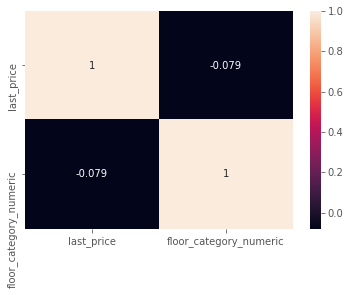

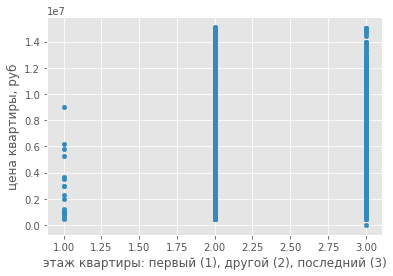

In [45]:
# Конвертируем категориальный признак в числовые данные, где 1 - первый этаж, 2 - другой и 3-последний
dict_floor_category = {'первый' : 1, 'другой' : 2, 'последний' : 3}
filtered_data['floor_category_numeric'] = filtered_data['floor_category'].apply(lambda x: dict_floor_category[x])

data_stat_2 = filtered_data[
    ['last_price', 'floor_category_numeric']]
display(data_stat_2.sample(5))

# Добавление элемента в словарь для подписи осей
dict_stat['floor_category_numeric'] = 'этаж квартиры: первый (1), другой (2), последний (3)'

corrdata_stat_2 = data_stat_2.corr()
sn.heatmap(corrdata_stat_2, annot=True)
plt.show()

data_stat_2.plot.scatter(x='floor_category_numeric', y='last_price')
plt.ylabel(dict_stat['last_price'])
plt.xlabel(dict_stat['floor_category_numeric'])
plt.show()

Корреляция слабая отрицательная. Может быть, до повсеместного распространения лифтов ситуация была бы иной.

##### * Изучение зависимости цены от даты размещения: дня недели, месяца и года.

,last_price,weekday,month,year
13926,4000000.0,3,3,2018
6754,1800000.0,3,12,2017
22427,8000000.0,3,2,2018
2582,6200000.0,0,12,2015
18151,5095000.0,2,4,2016


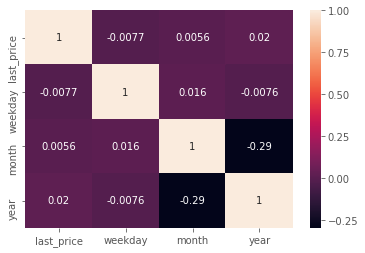

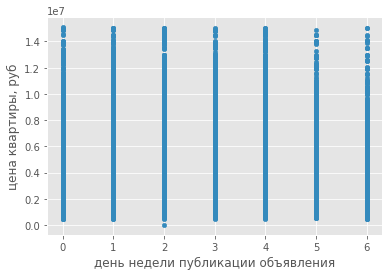

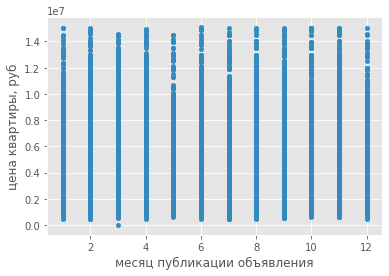

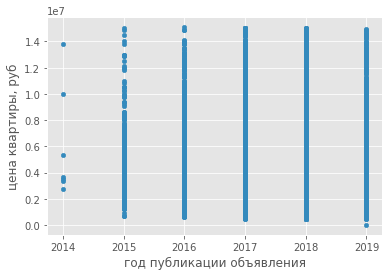

In [46]:
data_stat_3 = filtered_data[
    ['last_price', 'weekday', 'month', 'year']]
display(data_stat_3.sample(5))

# Добавление элементов в словарь для подписи осей
dict_stat['weekday'] = 'день недели публикации объявления'
dict_stat['month'] = 'месяц публикации объявления'
dict_stat['year'] = 'год публикации объявления'

corrdata_stat_3 = data_stat_3.corr()
sn.heatmap(corrdata_stat_3, annot=True)
plt.show()

for x in data_stat_3.loc[:, 'weekday':]:
    data_stat_3.plot.scatter(x=x, y='last_price')
    plt.ylabel(dict_stat['last_price'])
    plt.xlabel(dict_stat[x])
    plt.show()


Цена вообще не зависит от даты публикации объявлений

##### Зависимость цены квартиры от квадратного метра, количеством комнат и удаленности от центра.

Самая сильная положительная зависимость цены квартиры от ее площади - чем больше квартира, чем выше цена. Между тем, видно, что есть огромное множество квартир до 6 млн, имеют достаточно широкий размах по площади квартиры. Показатель корреляции 0,67, что является средним показателем, так как входит в интервал до 0,7. Тем не менее, с учетом дополнительного фактора, допустим, удаленности от центра города, - такая корреляция возможно будет стремиться к 1.

Что касается зависимости цены от количества комнат - она слабая. Конечно, наглядно видно, что квартиры с продажами 0 комнат (студии, малосемейки и т.д.), представлены по большей части в ценовом диапазоне до 4-5 млн, однушки - до 7 млн, двушки и трешки представлены в каждом ценовом сегменте примерно одинаково, 4х комнатные - редки, но в ценовом диапазоне от 3 до 10 млн руб. Это говорит о том, что во-первых, влияет площадь квартиры. И вряд ли найдутся однокомнатные квартиры площадью более 100 кв.м. Это неудобно, не функционально. Двушки и трешки же, напротив, разные по метражу и по функциональности. А четырехкомнатные квартиры большой площади - это редкость. Скорее всего, те, кто любит размах и готовы выложить много денег, покупают дома.

В ситуации с расстоянием до центра - корреляция отрицательная и средняя. Чем дальше от центра, тем дешевле квартира - это действительно так, но огромное количество квартир разной ценовой категории расположены в близости от центра города. Так сказать, на любой вкус и кошелек. Зависит от площади квартиры и, возможно, других факторов.


##### Зависимость цены от этажа квартиры.
Так как наибольшее количество квартир расположены не на крайних этажах дома, сложно сравнивать их с другими. Тем не менее.
Зависимость цены от количества этажей очень слабая. Это и понятно. Сейчас везде лифты, а то и два-три. Однако квартиры на первых этажах в основном, продаются в ценовом диапазоне до 4 млн руб. Наверное, никому не нравятся, когда заглядывают в окна, да еще и риски быть обворованным возрастают, нужна система безопасности.

##### Зависимость цены от дня, месяца и года публикации объявления.
Зависимость цены квартиры от даты публикации объявлений очень слабая. Ее почти нет. 
Можно заметить, что объявления реже выходят по выходным и в летние месяцы. В 2014 году почти не было объявлений, наверное, проект только стартовал. А в 2019 году объявлений стало меньше - влияние Авито, Юлы и Циан?

##### 5) Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. ##### 

In [47]:
# Создание переменной, в которой содержаться топ-10 населенных пунктов по убыванию количества объявлений
locality_rating = filtered_data['locality_name'].value_counts().head(10)

# Функция пользуется срезом данных, где населенные пункты входят в список индексов предыдущей переменной и группирует
# данные по средней стоимости квартир.
data_locality_stat = filtered_data.query('locality_name in @locality_rating.index').pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'mean'])
data_locality_stat.columns = ['ads_count', 'mean_price_per_m2']
display(data_locality_stat.sort_values('mean_price_per_m2', ascending=False))


,ads_count,mean_price_per_m2
locality_name,,
Санкт-Петербург,11822,105986.537099
Пушкин,285,100288.345004
деревня Кудрово,273,92789.260464
посёлок Парголово,314,90048.513213
посёлок Мурино,493,85801.271057
посёлок Шушары,419,78500.940603
Колпино,305,75444.081149
Гатчина,267,68674.640703
Всеволожск,352,66995.231633


Результат неудивителен - в Санкт-Петербурге самые дорогие квартиры из всех населенных пунктах. Так как это культурная столица России, а еще здесь больше предложений о работе, что приводит к большому спросу на квартиры. Но об этом не здесь.
Остальные населенные пункты находятся вблизи города, в Кудрово, Парголово, Мурино и Шушары есть даже метро. 
А Выборг, конечно, прекрасен, но далек от Санкт-Петербурга, и там очень мало работы.

##### 6)  Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. ##### 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 0 to 23691
Data columns (total 30 columns):
total_images              11822 non-null int64
last_price                11822 non-null float64
total_area                11822 non-null float64
first_day_exposition      11822 non-null datetime64[ns]
rooms                     11822 non-null int64
ceiling_height            11822 non-null float64
floors_total              11822 non-null int64
living_area               11822 non-null float64
floor                     11822 non-null int64
is_apartment              11822 non-null bool
studio                    11822 non-null bool
open_plan                 11822 non-null bool
kitchen_area              11822 non-null float64
balcony                   11822 non-null int64
locality_name             11822 non-null object
airports_nearest          11807 non-null float64
cityCenters_nearest       11822 non-null float64
parks_around3000          11822 non-null float64
parks_nearest         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

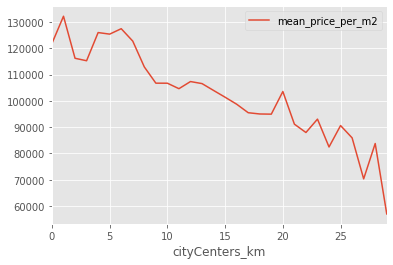

In [48]:
data_spb = filtered_data.query('locality_name == "Санкт-Петербург"')
data_spb.info()

# Создаем стобец с километражем
data_spb['cityCenters_km'] = data_spb['cityCenters_nearest'] / 1000

# Приведение километража в целочисленные значения для дальнейшей группировки
data_spb['cityCenters_km'] = data_spb['cityCenters_km'].astype('int')

data_spb.sort_values('cityCenters_km', inplace=True)
print(data_spb['cityCenters_km'].describe())

# Создаем сводную таблицу, в которой будет отражена средняя цена за кв.м. на каждом километре.
# Внедряем индекс слева от таблицы, чтобы в дальшнейшем использовать таблицу для построения графика.
price_distance = data_spb.pivot_table(index='cityCenters_km', values = 'price_per_m2', aggfunc=['mean', 'count']).reset_index()
print(price_distance)

# Построение графика
price_distance.columns = ['cityCenters_km','mean_price_per_m2', 'count_flats']
price_distance.plot(x='cityCenters_km', y='mean_price_per_m2')


График очень сильно преломляется в начале своего пути, на двух километрах. Этот промежуток - от 0 до 2 и выделим в качестве центральной зоны города Санкт-Петербурга.

##### 7)  Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?#####


,last_price,total_area,rooms,cityCenters_nearest
1483,6500000.0,72.0,3,1755.0
17572,11950000.0,80.0,3,1139.0
16020,9900000.0,75.1,2,1230.0
19798,9300000.0,83.4,3,2945.0
19399,7950000.0,46.3,1,2334.0


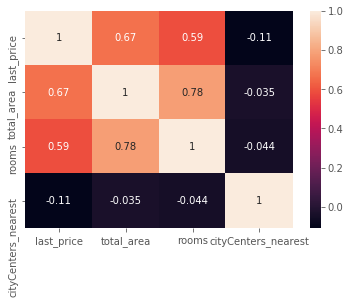

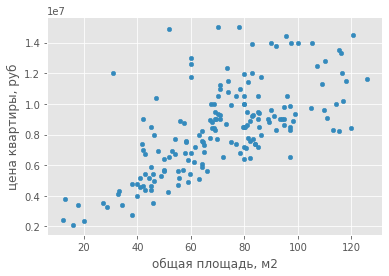

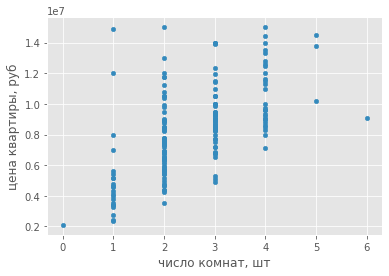

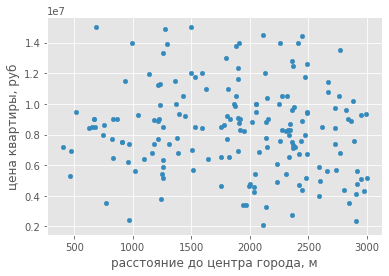

In [49]:
data_spb_centre = data_spb.query('cityCenters_km <= 2')
data_stat_1_spb_centre = data_spb_centre[
    ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
display(data_stat_1_spb_centre.sample(5))

corrdata_stat_1_spb_centre = data_stat_1_spb_centre.corr()
sn.heatmap(corrdata_stat_1_spb_centre, annot=True)
plt.show()

for x in data_stat_1_spb_centre.loc[:, 'total_area':]:
    data_stat_1_spb_centre.plot.scatter(x=x, y='last_price')
    plt.ylabel(dict_stat['last_price'])
    plt.xlabel(dict_stat[x])
    plt.show()


Зависимость цены от метража примерно одинакова, от количества комнат - корреляция усилилась (индекс вырос от 0,39 до 0,54). С удаленностью от центра - слабая, и это понятно, так как цена примерно одинакова.

,last_price,floor_category_numeric
18514,9200000.0,3
14741,12000000.0,2
16117,9600000.0,3
12948,14000000.0,3
9637,3990900.0,2


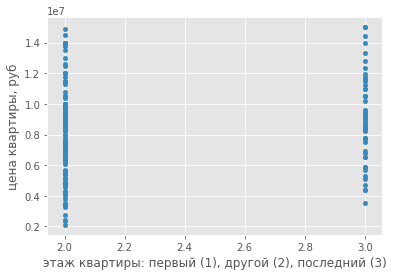

In [50]:
data_stat_2_spb_centre = data_spb_centre[
    ['last_price', 'floor_category_numeric']]

display(data_stat_2_spb_centre.sample(5))

data_stat_2_spb_centre.plot.scatter(x='floor_category_numeric', y='last_price')
plt.ylabel(dict_stat['last_price'])
plt.xlabel(dict_stat['floor_category_numeric'])
plt.show()

Квартиры на первых этажах отсутствуют, корреляция очень слабая

,last_price,weekday,month,year
9916,6900000.0,4,2,2019
22533,9000000.0,1,6,2017
12840,5650000.0,2,11,2015
9608,6400000.0,5,9,2018
4128,8589000.0,6,8,2015


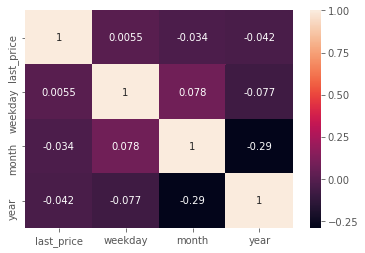

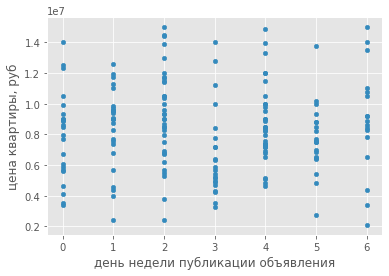

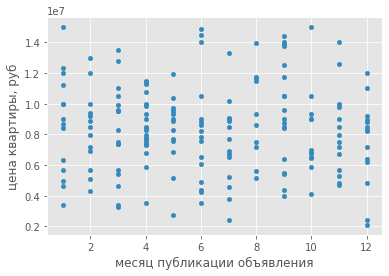

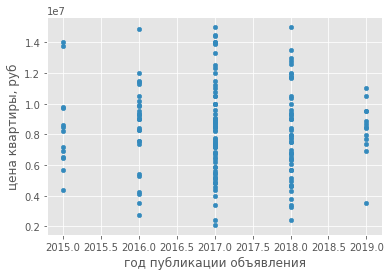

In [51]:
data_stat_3_spb_centre = data_spb_centre[
    ['last_price', 'weekday', 'month', 'year']]
display(data_stat_3_spb_centre.sample(5))

corrdata_stat_3_spb_centre = data_stat_3_spb_centre.corr()
sn.heatmap(corrdata_stat_3_spb_centre, annot=True)

for x in data_stat_3_spb_centre.loc[:, 'weekday':]:
    data_stat_3_spb_centre.plot.scatter(x=x, y='last_price')
    plt.ylabel(dict_stat['last_price'])
    plt.xlabel(dict_stat[x])
    plt.show()

##### Зависимость цены квартиры от квадратного метра, количеством комнат и удаленности от центра.

Зависимость цены от метража примерно одинакова по всему СПБ и Ленинградской области - чем больше квартира, тем выше цена. Однако при преодолении отметки в прайсе 6 млн.руб. квартиры слегла больше распыляются по графику.
от количества комнат - корреляция усилилась (индекс вырос от 0,39 до 0,54). Тут видно наглядно, что чем больше комнат, тем выше цена. МОжет быть, каждая комната - это уже памятник истории?
С удаленностью от центра - слабая, и это понятно, так как цена квартир в небольшом радиусе отличается в зависимости от других факторов - например, от количества комнат и площади.

##### Зависимость цены квартиры от этажа квартиры.

На первых этажах квартир вообще нет. Эти квартиры давно уже выкуплены, сдаются или просто используются на коммерческой основе. Ведь это прибыльно. КОрреляция положительная и слабая - как и по всему городу. 

##### Зависимость цены квартиры от дня, месяца и года публикации объявления.

Зависимость цены от даты публикации объявления так же, как и в случае по всему городу, очень слабая. Большинство объявлений подают по средам и в конце-начале года. 

## <a id="step5">Шаг 5. Выводы</a>

##### Исходя из проведенного анализа, можно подвести итоги: #####

Рыночная стоимость объктов недвижимости складывается, преимущественно, из двух параметров - общая площадь помещения и удаленность от центра города. Количество комнат может повлиять, но не сильно, только если в центре города - чем больше комнат, тем выше цена. Возможно, это связано с историческим наследием. Этажность важна только в центре города - есть предположения, что квартиры на первом этаже зданий в центре стоили бы гораздо выше и меняли бы статистику. Дата публикаций объявлений вообще не важна, важна лишь сезонность их появления - шанс купить лучший вариант возрастает в декабре-январе.

При возникновении аномалий, не свойственных данной выборке, следует внимательно изучить другие параметры, ведь мошенники часто занижает цену за квартиру для привлечения бОльшего количества потенциальных жертв, которые всегда в поиске лучшего варианта за меньшие деньги.
